In [1]:
# -*- coding: utf-8 -*- 
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the mems dataset. 
# implemented KNeighbors Classifier Classifier. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import time
import numpy as np
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



2024-05-02 17:02:46.045702: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 17:02:46.084179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 17:02:46.731924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the cleaned Simargl 2022 dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT/IOT_Datasets/mems_dataset.csv')


# Drop duplicates
df = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value
one_value = df.columns[df.nunique() == 1]
df = df.drop(columns = one_value, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21563 entries, 0 to 21575
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       21563 non-null  float64
 1   y       21563 non-null  float64
 2   z       21563 non-null  float64
 3   label   21563 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 842.3 KB


In [3]:
# X-axis: Represents acceleration along the horizontal axis.
# Y-axis: Represents acceleration along the vertical axis.
# Z-axis: Represents acceleration along the depth axis.

# labels 
#1. Normal: This label represents the state of the machine when it is operating under normal conditions, without any significant mechanical imbalance or impending failure.
#2. Near-failure: This label indicates that the machine is experiencing conditions that suggest it is close to a failure state. These conditions may include early signs of mechanical imbalance or other issues that could lead to failure if not addressed.
#3. Failure: This label is assigned when the machine has reached a state of failure, where it is no longer functioning as intended due to mechanical issues or other problems.


# Extract subsample of data
print (" Extract subsample of data: ")
print(df['label'].value_counts())

 Extract subsample of data: 
label
1    10955
2     5771
3     4837
Name: count, dtype: int64


In [4]:
dropped_df = ['label']
X = df.drop(dropped_df, axis=1)
y = df['label']


In [5]:
# Clear TensorFlow session
tf.keras.backend.clear_session()

In [29]:

start_time = time.time()

# Initial train test split set and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Prepare the data for CNN
# Reshape the data into 3D array (pseudo-image representation)
# Each sample will be reshaped into a 3D array with shape (x, y, z)
num_timesteps = len(X.columns)  # Number of timesteps (X, Y, Z)
num_channels = 1  # Number of channels (since it's grayscale)
X_train_reshaped = X_train_scaled.reshape(-1, num_timesteps, num_channels)
X_test_reshaped = X_test_scaled.reshape(-1, num_timesteps, num_channels)


# 4. Build and compile the CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(num_timesteps, num_channels)))
# Add more layers as needed
# ...
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


start_train_time = time.time()
# Train the CNN model
model.fit(X_train_reshaped, y_train, epochs=30, validation_data=(X_test_reshaped, y_test))
train_time = time.time() - start_train_time

start_pred_time = time.time()
# Make predictions
y_pred = model.predict(X_test_reshaped)
pred_time = time.time() - start_pred_time


# Calculate total time
total_time = time.time() - start_time

Epoch 1/30


/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5107 - loss: 1.5796 - val_accuracy: 0.6794 - val_loss: 0.7213
Epoch 2/30
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6965 - loss: 0.6977 - val_accuracy: 0.6916 - val_loss: 0.6741
Epoch 3/30
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7178 - loss: 0.6559 - val_accuracy: 0.6927 - val_loss: 0.6672
Epoch 4/30
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7126 - loss: 0.6502 - val_accuracy: 0.6962 - val_loss: 0.6629
Epoch 5/30
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7088 - loss: 0.6537 - val_accuracy: 0.6969 - val_loss: 0.6630
Epoch 6/30
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7122 - loss: 0.6489 - val_accuracy: 0.6996 - val_loss: 0.6605
Epoch 7/30
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7146 - loss: 0.6480 - val_accuracy: 0.6967 - val_loss: 0.6585
Epoch 8/30
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7105 - loss: 0.6445 - val_accuracy: 0.7020 - val_

In [30]:

print("Time taken for training:{:f} seconds".format(train_time))
print("Time taken for prediction: {:f} seconds".format(pred_time))
print("Total time taken:{:f} seconds".format(total_time))

Time taken for training:54.693044 seconds
Time taken for prediction: 0.605505 seconds
Total time taken:55.338441 seconds


In [31]:
# 6. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy}')

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6993 - loss: 0.6573
Test Accuracy: 0.7033544778823853


In [32]:
# 7. Generate classification report
predictions = np.argmax(y_pred, axis=-1)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.82      0.75      3287
           2       0.77      0.79      0.78      1731
           3       0.64      0.33      0.44      1451

    accuracy                           0.70      6469
   macro avg       0.70      0.65      0.65      6469
weighted avg       0.70      0.70      0.69      6469



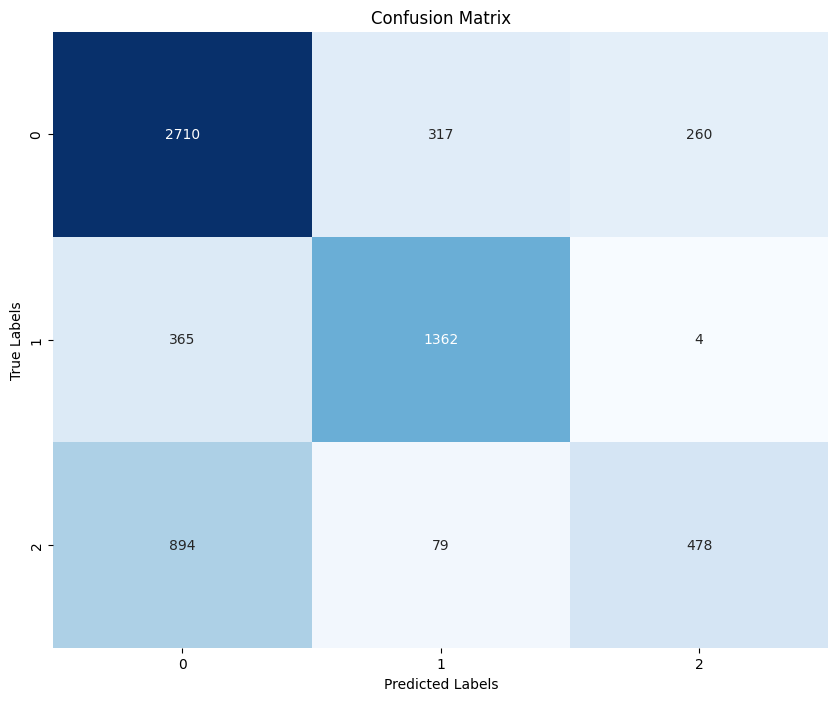

In [33]:
# 7. Generate confusion matrix
predictions = np.argmax(y_pred, axis=-1)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()